In [1]:
#importing libraries & packages
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# improtijng dataset
data = pd.read_csv('baseball.csv')

In [3]:
data.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [4]:
# W (wins) is the target.

In [5]:
#checking data shape
data.shape

(30, 17)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [7]:
#checking for missing values
data.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [8]:
#there is no null values

In [9]:
data.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [10]:
#visualization

<AxesSubplot:xlabel='W', ylabel='Count'>

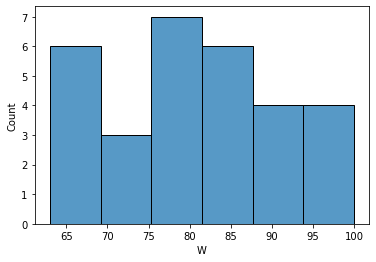

In [11]:
sns.histplot(data['W'])

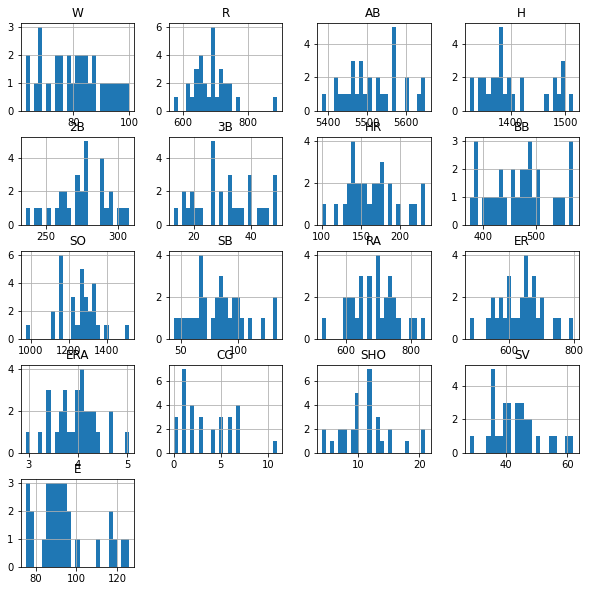

In [12]:
data.hist(bins=25, figsize=(10,10))
plt.show()

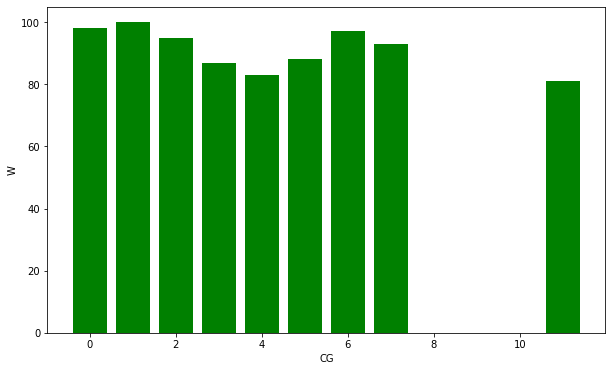

In [13]:
plt.figure(figsize=[10,6])
plt.bar(data['CG'],data['W'], color = 'green')
plt.xlabel('CG')
plt.ylabel('W')
plt.show()

<AxesSubplot:>

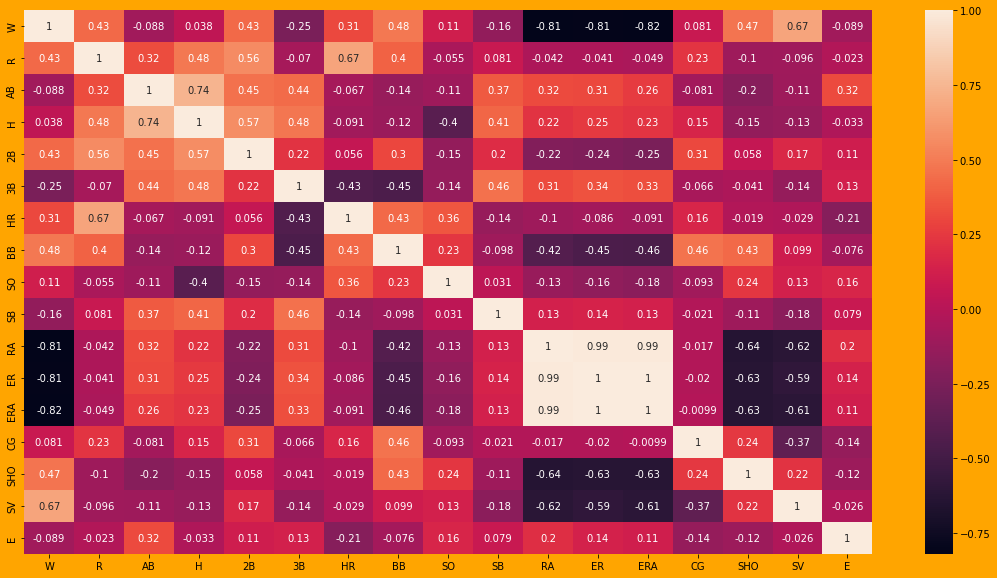

In [14]:
#checking correlation
plt.figure(figsize=[19,10], facecolor='orange')
sns.heatmap(data.corr(), annot= True)

In [15]:
# creating target variable

data['Train']= [1 if x >= 7 else 0 for x in data['W']]

In [16]:
#seperating feature variable and target variable
x = data.drop(['E', 'Train'], axis = 1)
y = data['Train']

In [17]:
data['Train'].value_counts()

1    30
Name: Train, dtype: int64

In [18]:
# Normalizing
from sklearn.preprocessing import StandardScaler
x_features = x
x = StandardScaler().fit_transform(x)

In [19]:
# splitting dataset
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split (x, y, test_size = .25, random_state = 0)

In [20]:
#models

In [21]:
# Decision tree

from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

DecisionTreeModel = DecisionTreeClassifier(random_state=1)
DecisionTreeModel.fit(x_train, y_train)
predict_y = DecisionTreeModel.predict(x_test)

print(classification_report(y_test, predict_y))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         8

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



In [22]:
acc_1 = accuracy_score (y_test, predict_y)

acc_1 * 100

100.0

In [23]:
# random forest

from sklearn.ensemble import RandomForestClassifier

RandomForestModel = RandomForestClassifier(random_state=1)
RandomForestModel.fit(x_train, y_train)
predict = RandomForestModel.predict(x_test)

print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         8

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



In [24]:
acc_2 = accuracy_score (y_test, predict)

acc_2*100

100.0

In [25]:
# Hence, Random forest, Decision tree model's got 100% accuracy and all models are the best models.

In [26]:
#saving model
import joblib

joblib.dump (acc_1, 'finalmodel.pkl')

['finalmodel.pkl']